# Building a linear regression model using ridge regression

Here we'll repeat the same process that was did in the lasso-regression.ipynb, but using the ridge regression method for regularization. For more details about the code, you should check the lasso-regression notebook.

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import utils
from sklearn.feature_extraction.text import TfidfVectorizer

# para conseguir repetir o experimento 
seed = 50
np.random.seed(seed)

In [20]:
def vectorization(features_list):

    data = features_list

    def tokenize(formula):

        tokens = [formula[i:i+2] for i in range(0, len(formula)-1, 2)]
        return tokens

    vectorizer = TfidfVectorizer(tokenizer=tokenize, lowercase=False)

    tfidf_matrix = vectorizer.fit_transform(data)

    df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
    
    return df


In [21]:
df = pd.read_csv('AB2_formation_energy_materials_spacegroup.csv')
df.drop('Unnamed: 0', axis='columns', inplace=True)
df.head(5)
df = df.dropna(axis=1)

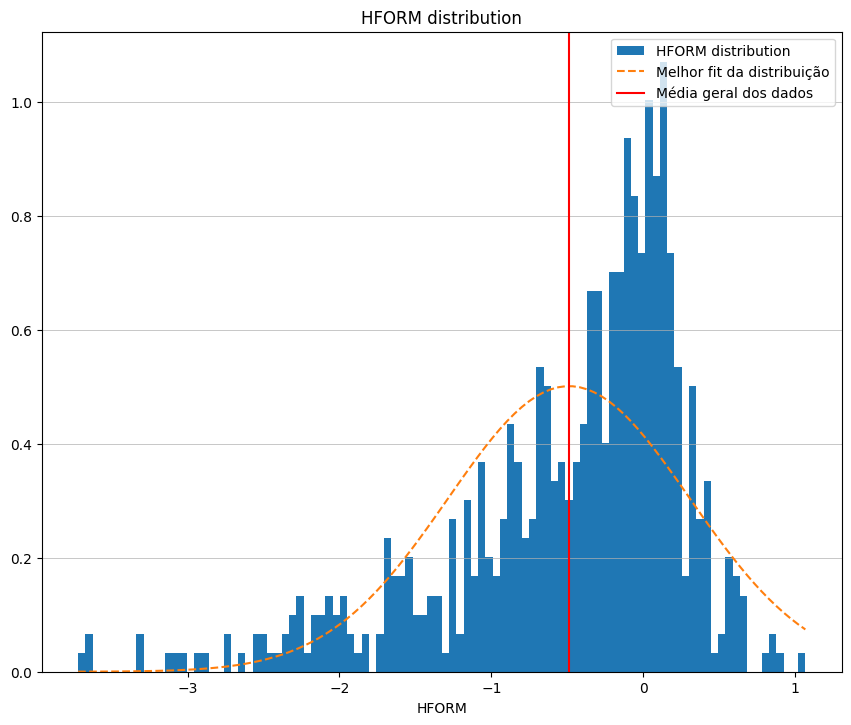

In [22]:
utils.histogram('fixed_bins_size', df['hform'], 'HFORM', 'upper right', 100, 'HFORM distribution')

## Vectorizing

In [23]:
features = df.drop(columns=['hform', 'Material', 'Space Group'])

In [24]:
material_vectorization = vectorization(df['Material'].tolist())
space_vectorization = vectorization(df['Space Group'].tolist())
features = pd.concat([features, material_vectorization, space_vectorization], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


We should spliting our data to separate the df in two sets: train set e test set. Since we have a different dictionary to our features and target, we'll do the following

In [25]:
from sklearn.model_selection import train_test_split


features_train, features_test = train_test_split(features, test_size = 0.2, random_state = 2)
target_train, target_test = train_test_split(df['hform'], test_size = 0.2, random_state = 2)


## Ridge Regression

Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values being far away from the actual values. 

In [31]:
from sklearn import metrics
from sklearn import linear_model

model_ridge = linear_model.Ridge(alpha=1,max_iter=100000) # least square minimum
model_ridge.fit(features_train,target_train)

y_pred_train = model_ridge.predict(features_train)
train_error  = metrics.mean_squared_error(target_train, y_pred_train, squared=True)


y_pred_test=model_ridge.predict(features_test)
test_error=metrics.mean_squared_error(target_test, y_pred_test, squared=True)

print('Train error (MSE): ', train_error)
print('Test error (MSE):  ', test_error)


Train error (MSE):  0.09954562781898767
Test error (MSE):   0.14413989833423016


In [33]:
print('Ridge coef: ', model_ridge.coef_)
print('Max of the Ridge coef: ', np.max(np.abs(model_ridge.coef_)))
print('Min of the Ridge coef: ', np.min(np.abs(model_ridge.coef_)))
print('Index of the max of the Ridge coef: ', np.argmax(model_ridge.coef_))
print('Index of the min of the Ridge coef: ', np.argmin(np.abs(model_ridge.coef_)))

Ridge coef:  [-0.00953533  0.42973528 -0.11242344 -0.12399298  0.03006142 -0.01449019
  0.2508346   0.0524645   0.27640599 -0.1326206  -0.38867584 -0.22782441
  0.04241152  0.00380833  0.08275472 -0.00843947  0.00702892  0.00394313
  0.09259818  0.21008304  0.02673687  0.10432697  0.00539051  0.01516388
  0.01313654  0.0189383   0.00908891 -0.01701562  0.03489768 -0.04116322
  0.00451664 -0.01145806  0.35623448  0.10830137  0.00376672 -0.21287815
 -0.69253033 -0.38224295  0.17561733 -0.13710366  0.14050668 -0.00993219
 -0.03688603  0.09371266  0.8399447   0.17113963  0.12956427  0.22061958
  0.17887983 -0.03593409 -0.05259594 -0.0928825   0.2386737   0.09557381
  0.35089208 -0.04884904 -0.23932554  0.40620983  0.          0.03041632
  0.02183833  0.03034635  0.1260911  -0.14832493 -0.06358127  0.17379512
 -0.38312835  0.13457379 -0.35095015 -0.11118589  0.26561053 -0.0610293
  0.29551315 -0.21589038 -0.00154035 -0.04371193 -0.37095127  0.01760689
 -0.05929192 -0.38255964  0.22552748 -0

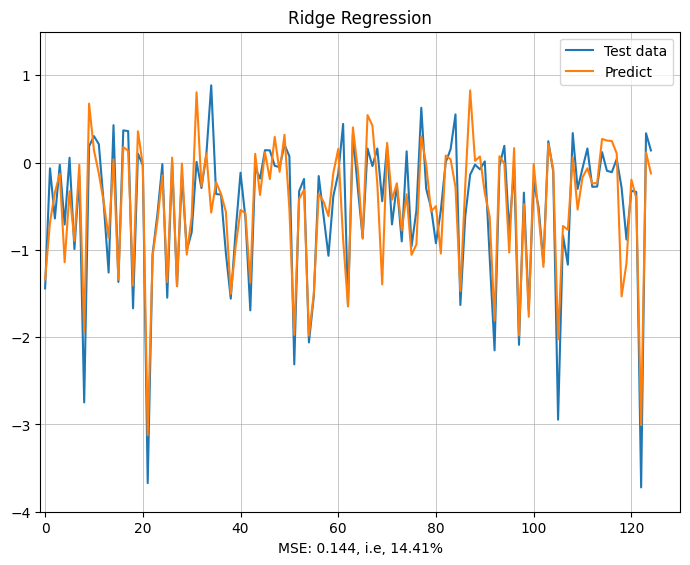

In [34]:
fig = plt.figure(figsize=(8,6))

axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(target_test.squeeze().reset_index(drop=True), ls='-', label="Test data")
axes.plot(y_pred_test, ls='-', label="Predict")
axes.set_xlim(-1, 130)
axes.set_ylim(-4, 1.5)
axes.set_title(f'Ridge Regression')
axes.legend(loc='upper right')
axes.set_xlabel(f'MSE: {test_error:.3f}, i.e, {test_error*100.0:.2f}%')

plt.grid(linestyle='-', linewidth=0.5)